#                                        CAR PRICE PREDICTION

## Problem Description:
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.



## Business Goal:
To Build a model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Dataset:
(https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("CarPrice.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### check is there any null values in DataFrame

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Data cleaning

### we can divided  into numerical and categorical columns

In [9]:
def get_cat_num(df):
    cat_col =[]
    num_col =[]
    for col in df.columns:
        if df[col].dtype=="O":
            cat_col.append(col)
        elif df[col].dtype=="int64" or df[col].dtype=="float64":
            num_col.append(col)
    return cat_col,num_col

In [10]:
cat_col,num_col =get_cat_num(df)

In [11]:
cat_col

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
num_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

#### We can analyze Cat_columns

In [13]:
for col in cat_col:
    print(df.groupby(col)[col].agg('count'))
    print("\n")

CarName
Nissan versa                1
alfa-romero Quadrifoglio    1
alfa-romero giulia          1
alfa-romero stelvio         1
audi 100 ls                 1
                           ..
volvo 246                   1
volvo 264gl                 2
volvo diesel                1
vw dasher                   1
vw rabbit                   1
Name: CarName, Length: 147, dtype: int64


fueltype
diesel     20
gas       185
Name: fueltype, dtype: int64


aspiration
std      168
turbo     37
Name: aspiration, dtype: int64


doornumber
four    115
two      90
Name: doornumber, dtype: int64


carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64


drivewheel
4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64


enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64


enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: enginetype, dtype: int

#### enginelocation – Since 202 out of 205 cars have the engine in the front, 
#### this column has low variance,making it less useful for prediction or analysis.

In [14]:
# we can drop some unwanted columns
columns = ['enginelocation','doornumber']
df1 = df.drop(columns=columns,axis=1)

In [15]:
#we can analyze Carname 
df1['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
df1['CarName'].nunique()

147

In [17]:
df1['CarName'] = df1['CarName'].apply(lambda x: x.split('-')[0].split()[0])


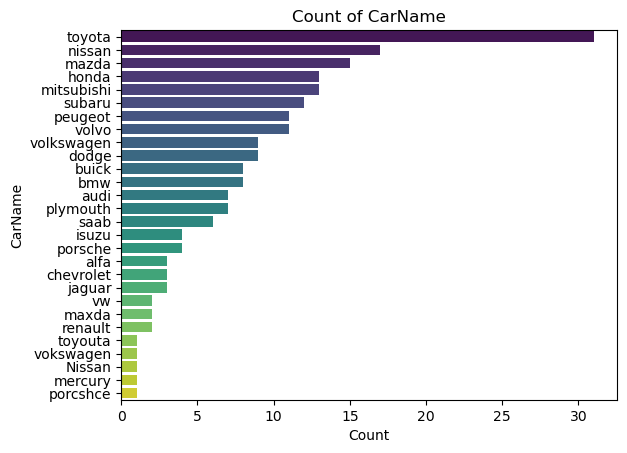

In [18]:
sns.countplot(y=df1['CarName'],order=df1['CarName'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("CarName")
plt.title("Count of CarName")
plt.show()

In [19]:
#list(df1['CarName'].unique())


#### Data Cleaning: Fixing Car Name Inconsistencies
The CarName column in the dataset contains inconsistencies due to misspellings, different capitalizations, and alternative representations of brand names. To ensure accurate analysis and visualization, we need to standardize these names.

In [20]:
# firstly we can convert string to Lower cases
df1['CarName'] = df1['CarName'].str.lower()


In [21]:
CarName_corrections = {
    "maxda": "mazda",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"  # Standardizing VW to Volkswagen
}

# Apply corrections
df1['CarName'] = df1['CarName'].replace(CarName_corrections)


In [22]:
df1['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa           3
renault        2
mercury        1
Name: CarName, dtype: int64

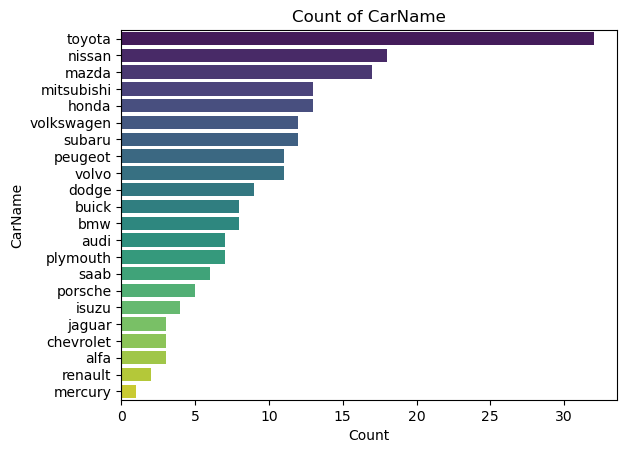

In [23]:
sns.countplot(y=df1['CarName'],order=df1['CarName'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("CarName")
plt.title("Count of CarName")
plt.show()


### visulaize the price distribution by Carname 


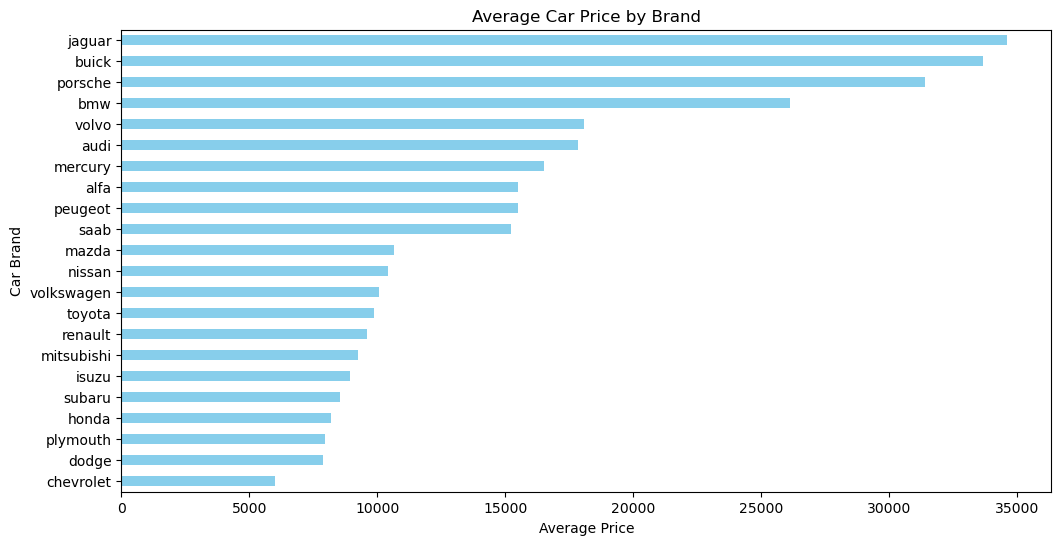

In [24]:
plt.figure(figsize=(12, 6))
df1.groupby('CarName')['price'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Car Brand")
plt.title("Average Car Price by Brand")
plt.show()

#### Check Correlation Between Brand and CarName (ANOVA Test)

In [25]:
import scipy.stats as stats

cars = list(df1['CarName'].unique())  
car_price_groups = [df1[df1['CarName'] == cars]['price'] for cars in cars]

f_stat, p_value = stats.f_oneway(*car_price_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 35.28760262982943, P-value: 3.6462600814846445e-53


#### Since the P-value is almost zero, we reject the null hypothesis, which means:CarName has a significant impact on price!

In [26]:
cat_col,num_col = get_cat_num(df1)

In [27]:

# # # Loop through categorical columns and plot countplots
# for col in cat_col:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=df1[col], order=df1[col].value_counts().index, palette='viridis')
#     plt.title(f'Distribution of {col}')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()

In [28]:
#we can drop CarId
df2 = df1.drop('car_ID',axis=1)

In [29]:
cat_col,num_col = get_cat_num(df2)

### NOW analayze the Numerical Columns

In [30]:
# num_col

In [31]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [32]:
# for col in num_col:
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()


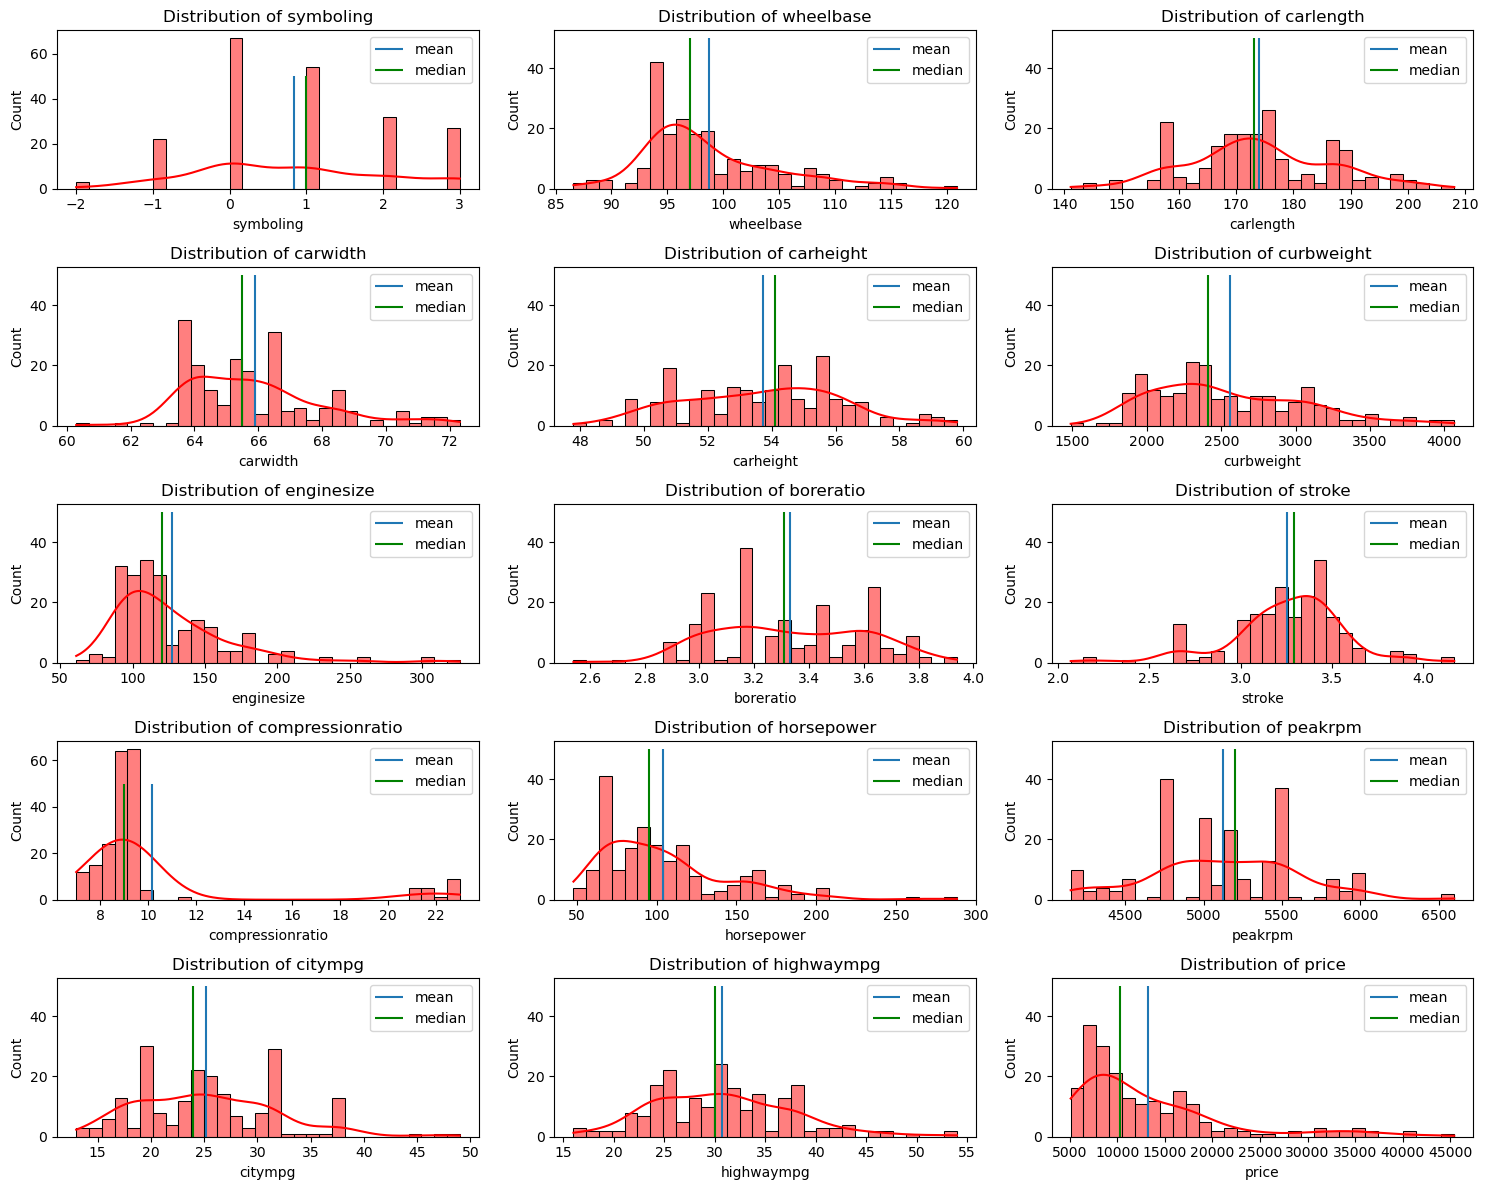

In [33]:
plt.figure(figsize=(15,12))
for i, col in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df2[col], bins=30, kde=True, color="red")
    plt.title(f"Distribution of {col}")
    plt.vlines(df2[col].mean(),ymin =0,ymax=50,label="mean")
    plt.vlines(df2[col].median(),ymin =0,ymax=50,label="median",color='green')
    plt.legend()
plt.tight_layout()
plt.show()

In [34]:
df3 = df2.copy(deep=True)

### check ouliers


In [35]:
# numerical_columns = df3.select_dtypes(include='number')
# for col in numerical_columns.columns:
#     sns.boxplot(x=col,data=df3)
#     plt.show()


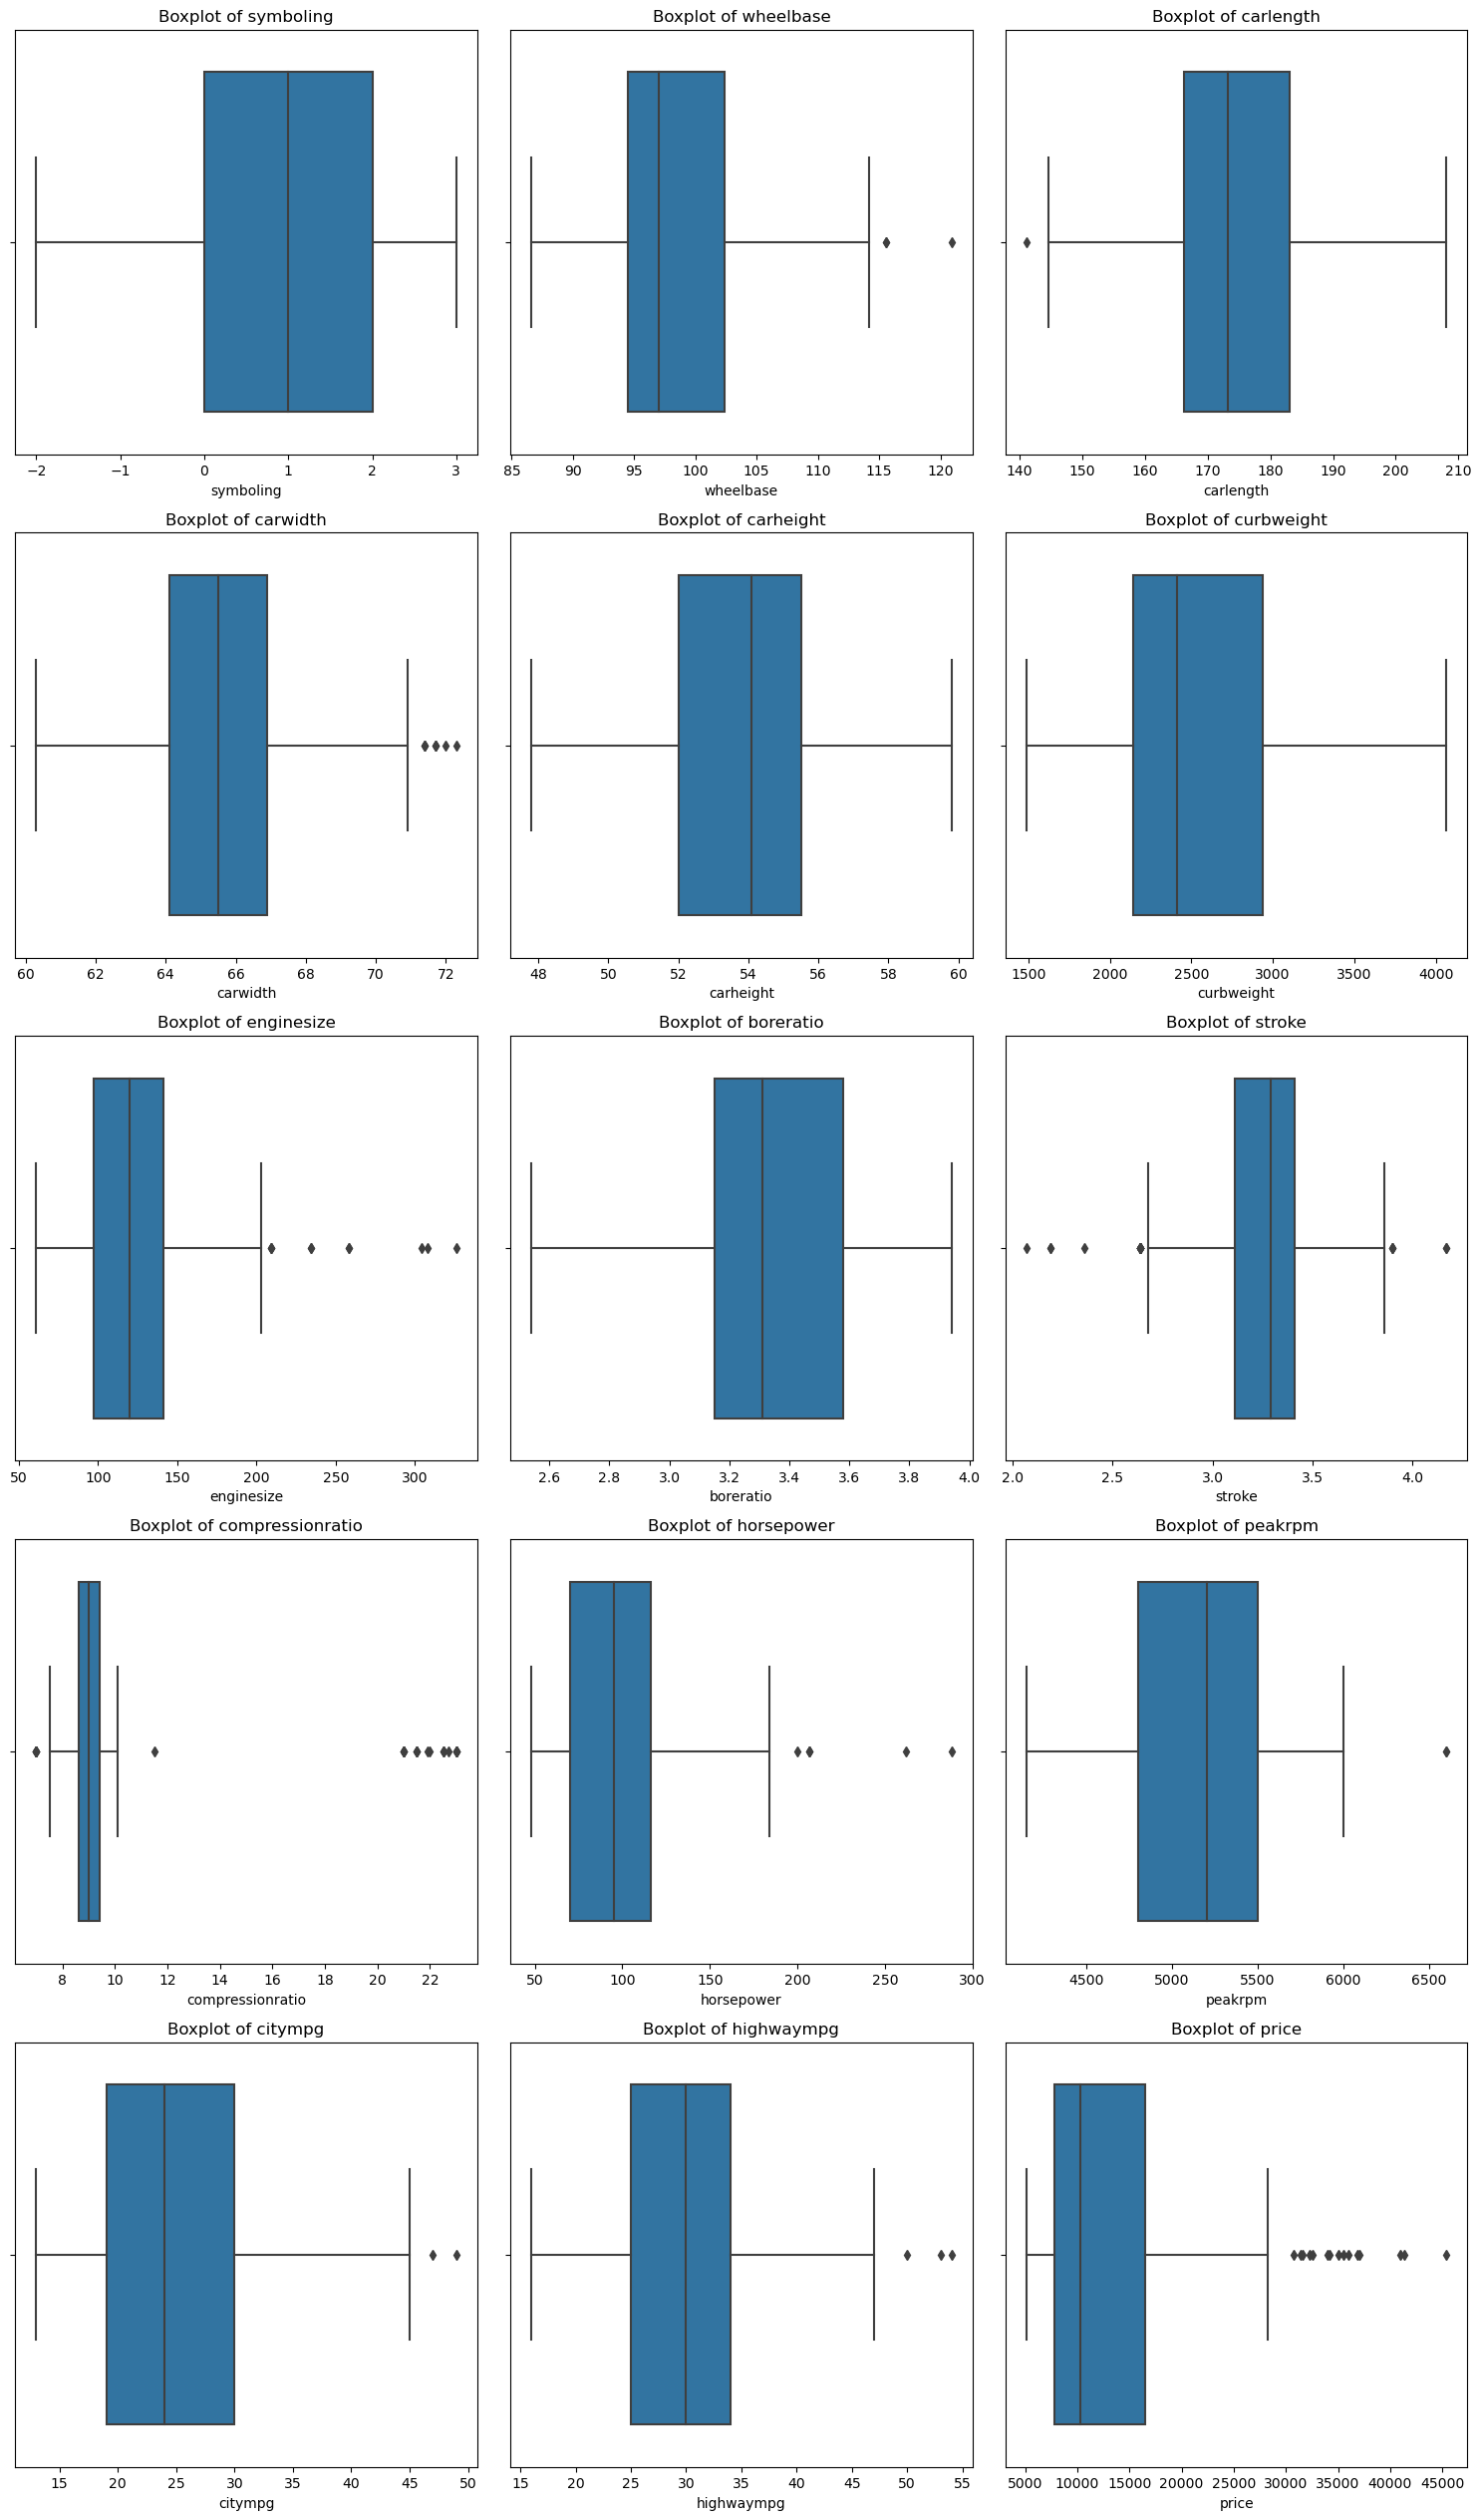

In [36]:
numerical_columns = df3.select_dtypes(include='number')
num_cols = len(numerical_columns.columns)
rows = (num_cols // 3) + 1  # Adjusting rows based on number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=df3[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Removeing outlier Using IQR method

In [37]:
# IQR Method
def outliers(df):
    for col in df3.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df3[col] = df3[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [38]:
df4 = outliers(df3)
df4.head(2)

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,alfa,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0


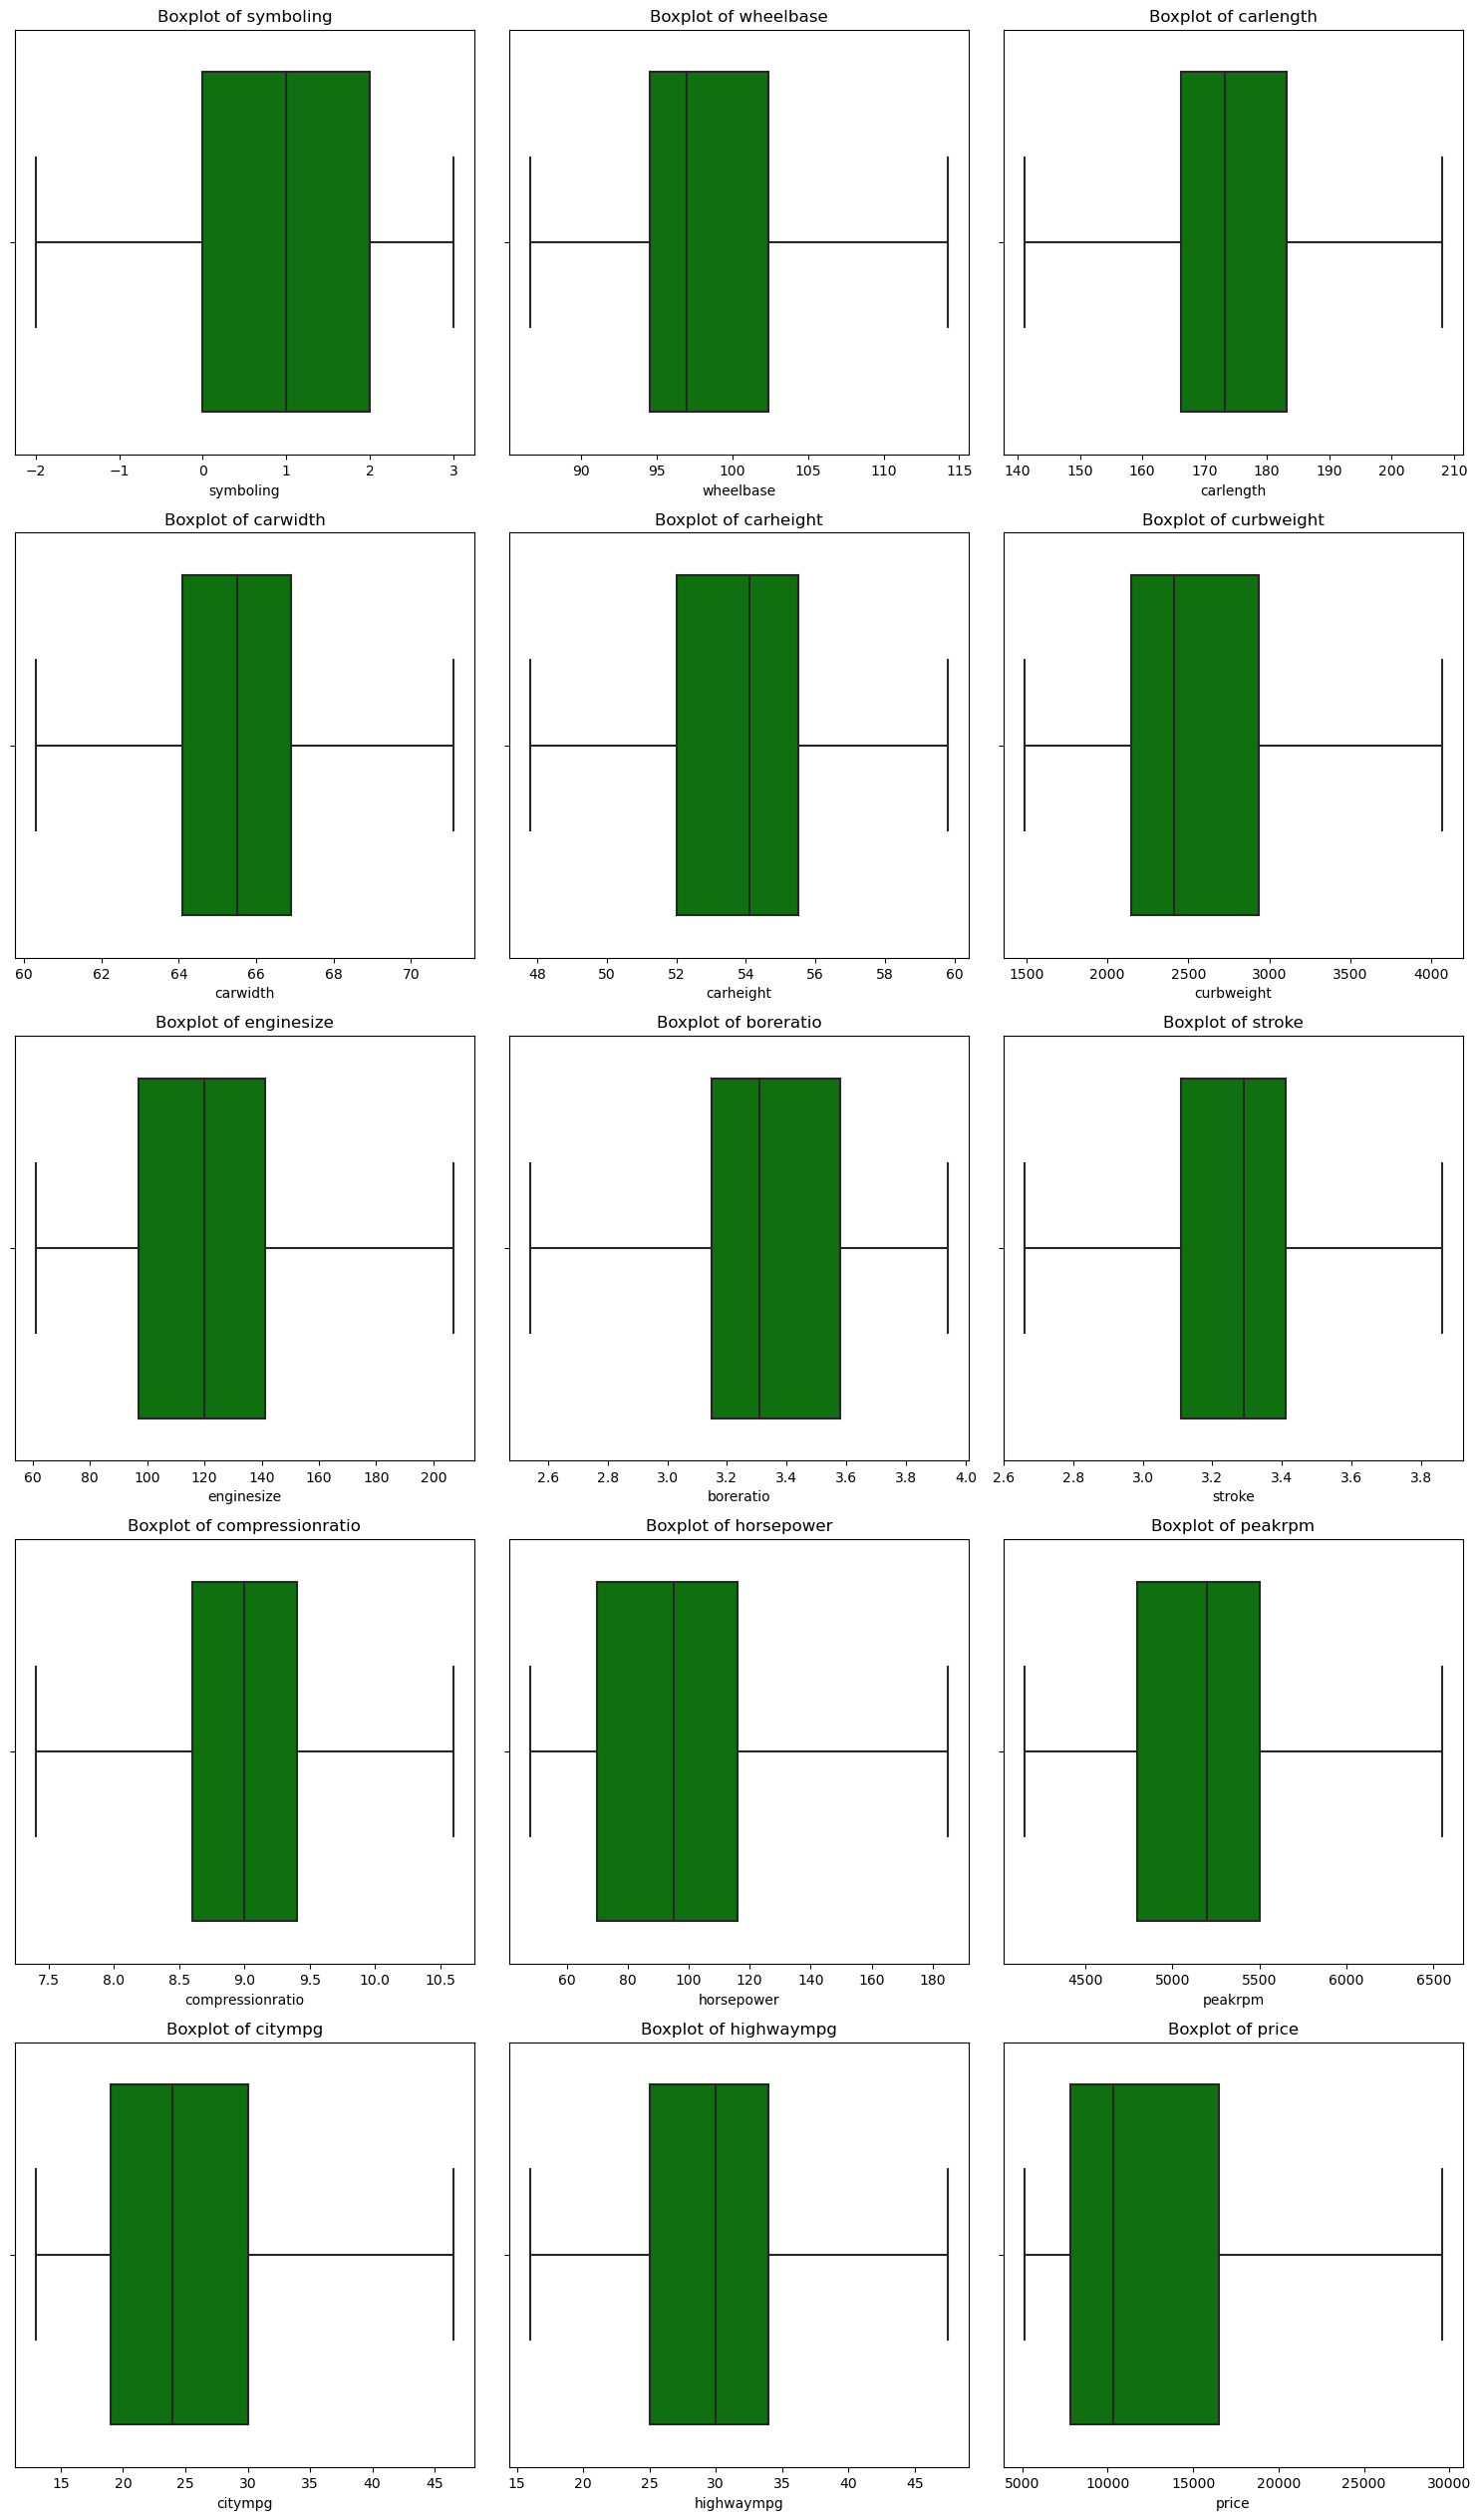

In [39]:
#after applying outlier function
numerical_columns = df4.select_dtypes(include='number')
num_cols = len(numerical_columns.columns)
rows = (num_cols // 3) + 1  # Adjusting rows based on number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=df4[col], ax=axes[i],color ='g')
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## ## After applying the IQR method, we can see that there are no more outliers in the data. Next, we can proceed to check the skewness of the data to evaluate its distribution. 

In [40]:
df4.skew()

symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

In [41]:
from sklearn.preprocessing import PowerTransformer

In [42]:
pt =PowerTransformer(method='yeo-johnson')

In [43]:
numerical_features = df4.select_dtypes(include=['int64','float64']).columns

In [44]:
df4[numerical_features] =pt.fit_transform(df4[numerical_features])

In [45]:
df4[numerical_features].skew()

symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

In [46]:
df4.head(2)

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.637336,alfa,gas,std,convertible,rwd,-2.388079,-0.404369,-3.885781e-15,-2.067534,...,0.378551,mpfi,0.525135,-1.94313,-0.044148,0.46542,-0.25429,-0.590218,-0.503712,0.472284
1,1.637336,alfa,gas,std,convertible,rwd,-2.388079,-0.404369,-3.885781e-15,-2.067534,...,0.378551,mpfi,0.525135,-1.94313,-0.044148,0.46542,-0.25429,-0.590218,-0.503712,0.852508


In [47]:
correlation = df4.corr()

### Visualize the correlation using a heatmap.

<Axes: >

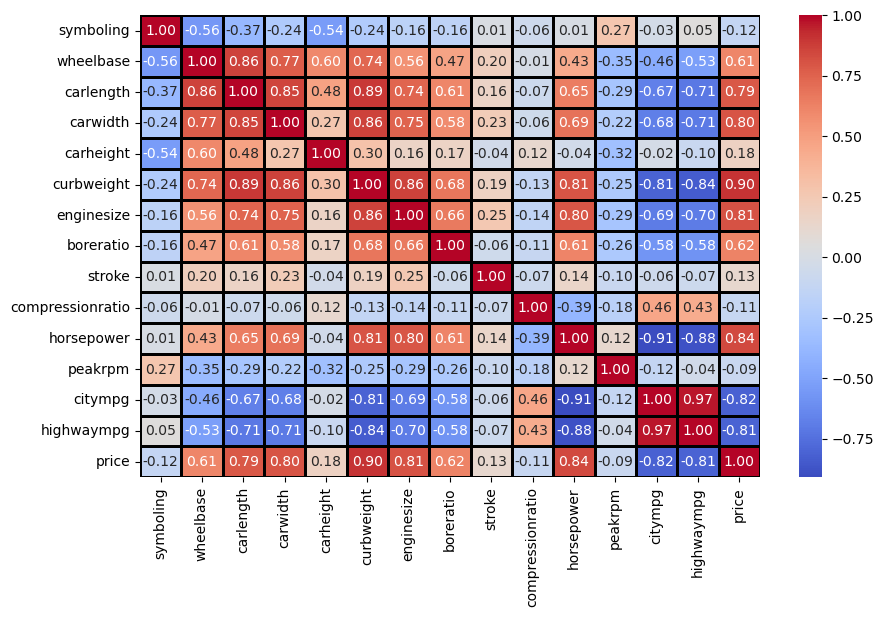

In [48]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm',linewidths=1,linecolor='black') #viridis

## Exploring the Relationship Between Car Features and Price

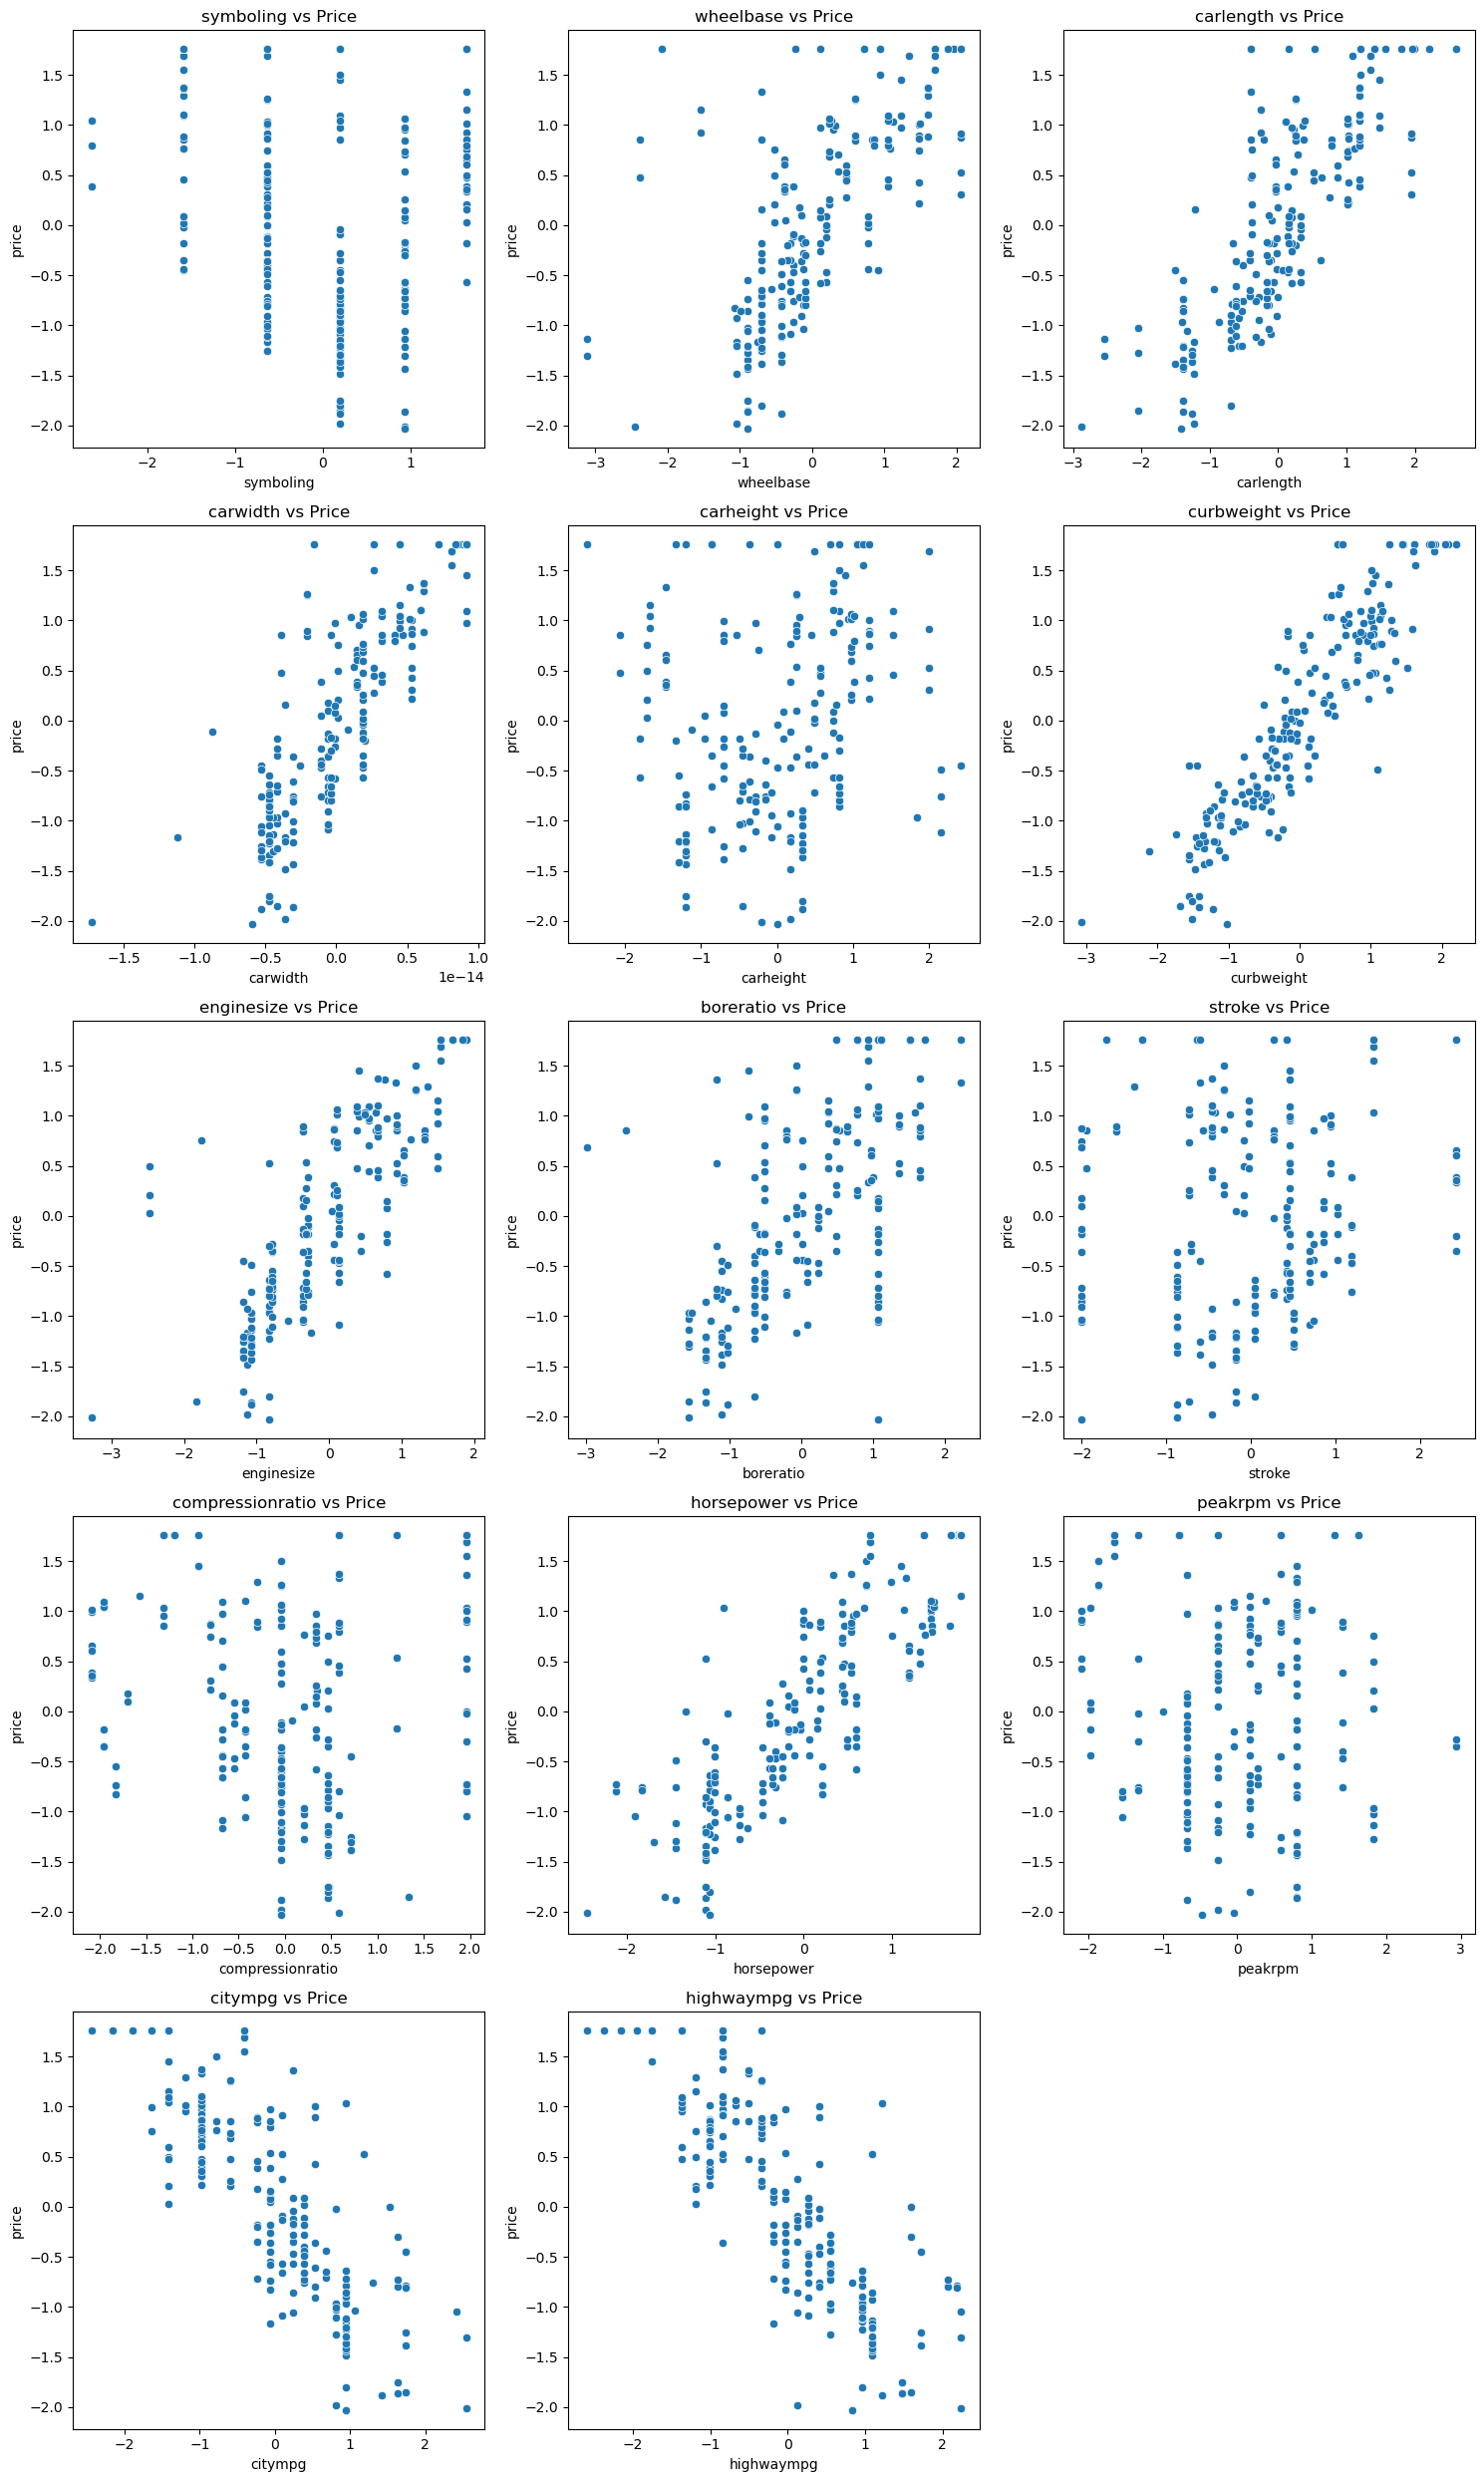

In [49]:
import math

num_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
            'curbweight', 'enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Determine the number of rows & columns for the subplot grid
n_cols = 3  # Set number of columns
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten in case of extra subplots

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df4, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"{col} vs Price")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Encoding The Categorical Features

In [50]:
categorical_feature = df4.select_dtypes(include='object').columns

In [51]:
categorical_feature

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

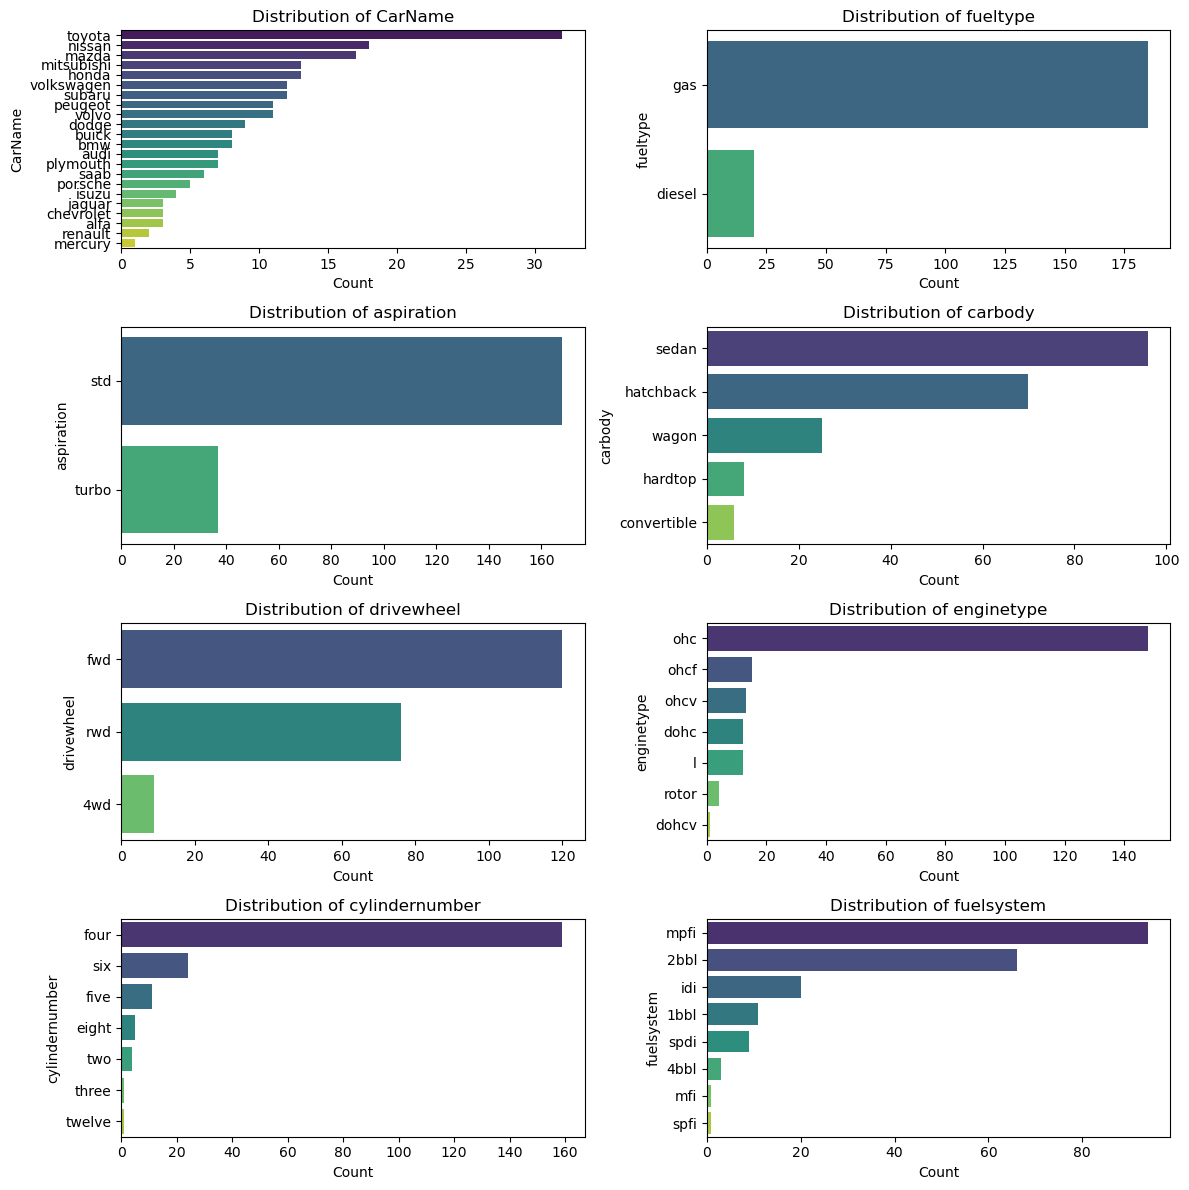

In [52]:
# we can visualize the cat_col
num_plots = len(cat_col)
cols = 2  # 2 plots per row
rows = (num_plots // cols) + (num_plots % cols > 0)  # Adjust row count dynamically

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))  # Adjust size
axes = axes.flatten()  # Flatten the axes for easy iteration

for i, col in enumerate(cat_col):
    sns.countplot(y=df4[col], order=df4[col].value_counts().index, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide extra subplots if cat_col is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [53]:
df4.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.637336,alfa,gas,std,convertible,rwd,-2.388079,-0.404369,-3.885781e-15,-2.067534,...,0.378551,mpfi,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712,0.472284
1,1.637336,alfa,gas,std,convertible,rwd,-2.388079,-0.404369,-3.885781e-15,-2.067534,...,0.378551,mpfi,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712,0.852508
2,0.194880,alfa,gas,std,hatchback,rwd,-0.703782,-0.205730,-3.608225e-16,-0.533373,...,0.937844,mpfi,-2.448083,0.740436,-0.044148,1.345802,-0.254290,-0.979465,-0.668315,0.852508
3,0.939497,audi,gas,std,sedan,fwd,0.364326,0.233459,1.221245e-15,0.249497,...,-0.322568,mpfi,-0.510857,0.463833,1.211504,0.216601,0.794396,-0.068606,-0.032312,0.537732
4,0.939497,audi,gas,std,sedan,4wd,0.294959,0.233459,1.609823e-15,0.249497,...,0.545752,mpfi,-0.510857,0.463833,-1.316724,0.566871,0.794396,-1.189069,-1.370772,0.951580


## Ordinal Encoding for Cylinder Number

In [54]:
cylinder_mapping = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df4['cylindernumber'] = df4['cylindernumber'].map(cylinder_mapping)


In [55]:
df4.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

## Label Encoding for Binary Categories

In [56]:
binary_cols = ['fueltype', 'aspiration']
le = LabelEncoder()

for col in binary_cols:
    df4[col] = le.fit_transform(df4[col])


In [57]:
print(df4.fueltype.unique())
print(df4.aspiration.unique())

[1 0]
[0 1]


## One-Hot Encoding for Nominal Categories

In [58]:
df4 = pd.get_dummies(df4, columns=['CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem'], drop_first=True)


In [59]:
df4.head()

,symboling,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.637336,1,0,-2.388079,-0.404369,-3.885781e-15,-2.067534,0.144823,4,0.378551,...,0,0,0,0,0,0,0,1,0,0
1,1.637336,1,0,-2.388079,-0.404369,-3.885781e-15,-2.067534,0.144823,4,0.378551,...,0,0,0,0,0,0,0,1,0,0
2,0.194880,1,0,-0.703782,-0.205730,-3.608225e-16,-0.533373,0.647098,6,0.937844,...,0,1,0,0,0,0,0,1,0,0
3,0.939497,1,0,0.364326,0.233459,1.221245e-15,0.249497,-0.303501,4,-0.322568,...,0,0,0,0,0,0,0,1,0,0
4,0.939497,1,0,0.294959,0.233459,1.609823e-15,0.249497,0.648780,5,0.545752,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df4.shape

(205, 58)

In [61]:
df5 = df4.copy()

## Feature selection

In [62]:
X = df5.drop('price',axis=1)
y = df5['price']

In [63]:
from sklearn.feature_selection import SelectKBest ,f_regression

In [64]:
sk =SelectKBest(score_func = f_regression ,k =10)

In [65]:
X_selected = sk.fit_transform(X,y)

In [66]:
selected_features = X.columns[sk.get_support()]
selected_features

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'fuelsystem_2bbl'],
      dtype='object')

In [67]:
feature_score = pd.DataFrame({"feature":X.columns ,"Score":sk.scores_}).sort_values(by="Score",ascending=False)
# feature_score

## Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_scaled = scaler.fit_transform(X_selected)

## Train-Test Split  

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## Choose a Model

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. MLPRegressor':MLPRegressor(),
    '7. AdaBoostRegressor':AdaBoostRegressor()
}

In [75]:
results ={}
for model_name,model in models.items():
    model.fit(X_train,y_train)#fit the model
    y_pred=model.predict(X_test) #make a prediction
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R²": r2,}

In [76]:
result_df = pd.DataFrame(results).T

In [77]:
result_df

,MSE,MAE,RMSE,R²
1. Linear Regression,0.141205,0.288678,0.375772,0.855135
2. Decision Tree Regressor,0.063957,0.194273,0.252897,0.934385
3. Random Forest Regressor,0.058244,0.185880,0.241337,0.940247
4. Gradiant Boosting Regressor,0.062724,0.201913,0.250447,0.935650
5. Support Vector Regressor,0.210632,0.311056,0.458947,0.783908
6. MLPRegressor,0.140396,0.290443,0.374694,0.855965
7. AdaBoostRegressor,0.104073,0.273726,0.322604,0.893229


## BestModel

In [78]:
best_model = result_df.loc[result_df['R²'].idxmax()]
best_model

MSE     0.058244
MAE     0.185880
RMSE    0.241337
R²      0.940247
Name: 3. Random Forest Regressor, dtype: float64

## Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [80]:
# param_grid = {
#     'n_estimators': [50, 100, 300, 500, 700],  
#     'max_depth': [None, 5, 10, 20, 40, 60],  
#     'min_samples_split': [2, 4, 8, 16],  
#     'min_samples_leaf': [1, 3, 5, 10],  
# }  

# rf = RandomForestRegressor(random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grid,
#     n_iter=30,  # More iterations for better tuning
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  
#     verbose=2,  
#     random_state=42)

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [None, 20, 40, 60],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

### Fit the new model

In [82]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 40, 60],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [300, 500, 800]},
             verbose=2)

In [83]:
# Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Model Evaluation

In [84]:
# Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2) 

MSE: 0.05751872084961851
R² Score: 0.9409904135120503
